### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from matplotlib.colors import LinearSegmentedColormap
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
# Set Arial as the default font family and set fontsize
mpl.rcParams['font.family'] = 'Arial'

#### Custom-made Functions

In [2]:
def read_slices_file (filename):
    with open(filename, "r") as f: content=f.readlines()
    splitted = [re.split(" |\n", line) for line in content]
    filtered = [list(filter(None, str_list)) for str_list in splitted]
    df = pd.DataFrame(filtered[1:], columns=filtered[0], dtype=float)
    df["PointA"] = df["PointA"].astype(int)
    df["PointB"] = df["PointB"].astype(int)
    df["Frame"] = df["Frame"].astype(int)
    return df

# TM Slices

### Analyze each Simulation separately

##### AlphaFold 

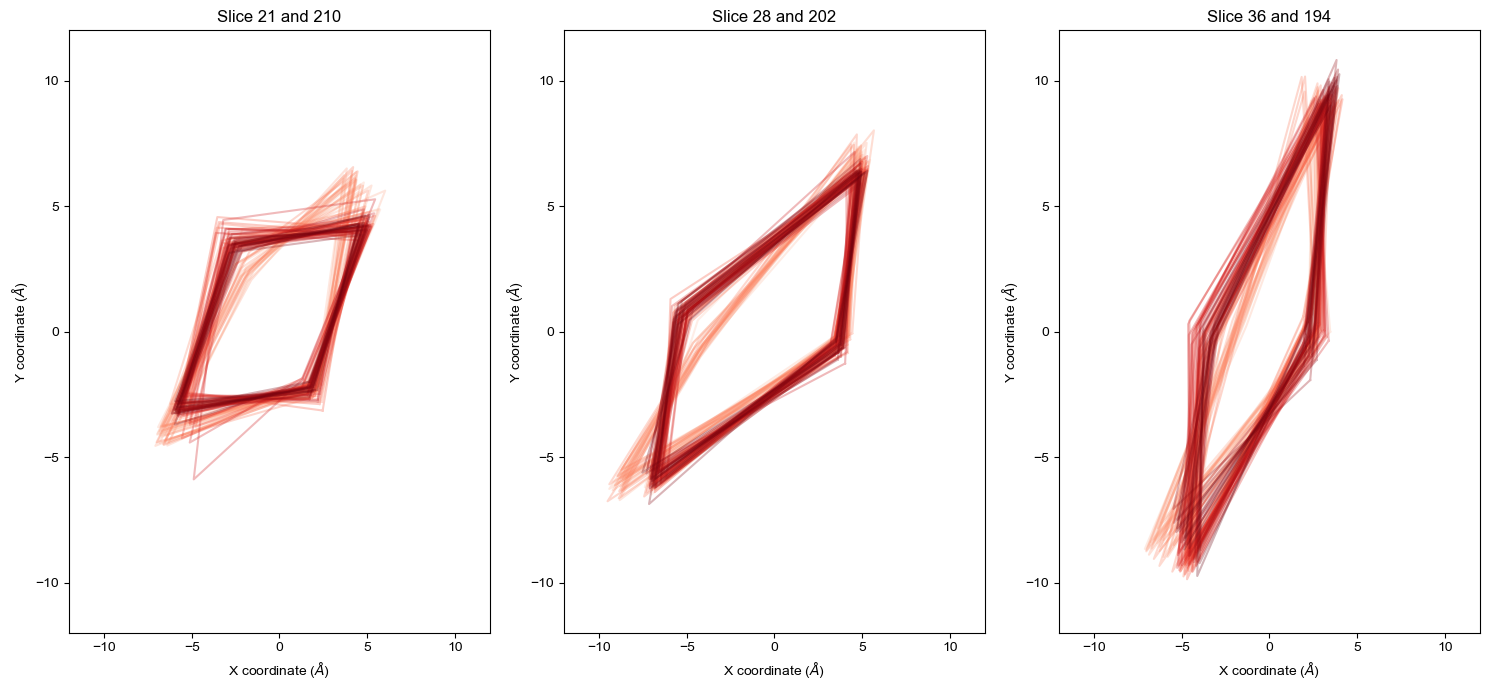

In [3]:
def plot_slices(df, n_of_last_frames):
    points = df.groupby(['PointA','PointB']).size().reset_index()
    max_ = max(df.Frame)
    step_ = 50
    colors1 = plt.cm.Reds(np.linspace(0.2, 1, max_))
    fig, axs = plt.subplots(1, len(points), figsize=(15,7))
    for ax,(_,point) in zip(axs, points.iterrows()):
        for i in range(1,max_, step_):
            tmp = df[(df.PointA==point.PointA) & (df.PointB==point.PointB)].tail(n_of_last_frames)
            x = [tmp.Ax[tmp.Frame==i], tmp.Bx[tmp.Frame==i], tmp.Cx[tmp.Frame==i], tmp.Dx[tmp.Frame==i], tmp.Ax[tmp.Frame==i]]
            y = [tmp.Ay[tmp.Frame==i], tmp.By[tmp.Frame==i], tmp.Cy[tmp.Frame==i], tmp.Dy[tmp.Frame==i], tmp.Ay[tmp.Frame==i]]
            ax.set_xlabel("X coordinate ($\AA$)")
            ax.set_ylabel("Y coordinate ($\AA$)")
            ax.plot(x - np.mean(x),y - np.mean(y), color=colors1[i-1], alpha=0.3)
            minimum = np.min([x - np.mean(x),y - np.mean(y)])
            maximum = np.max([x - np.mean(x),y - np.mean(y)])
            ax.set_title(f"Slice {point.PointA} and {point.PointB}")
            ax.set_xlim([-12, 12])
            ax.set_ylim([-12, 12])
    plt.tight_layout()
    plt.show()
    plt.close()

af = read_slices_file("Outputs/TMSlices_phoqaf_replicas.dat")
plot_slices(af, len(af))

##### AlphaFold with TMD

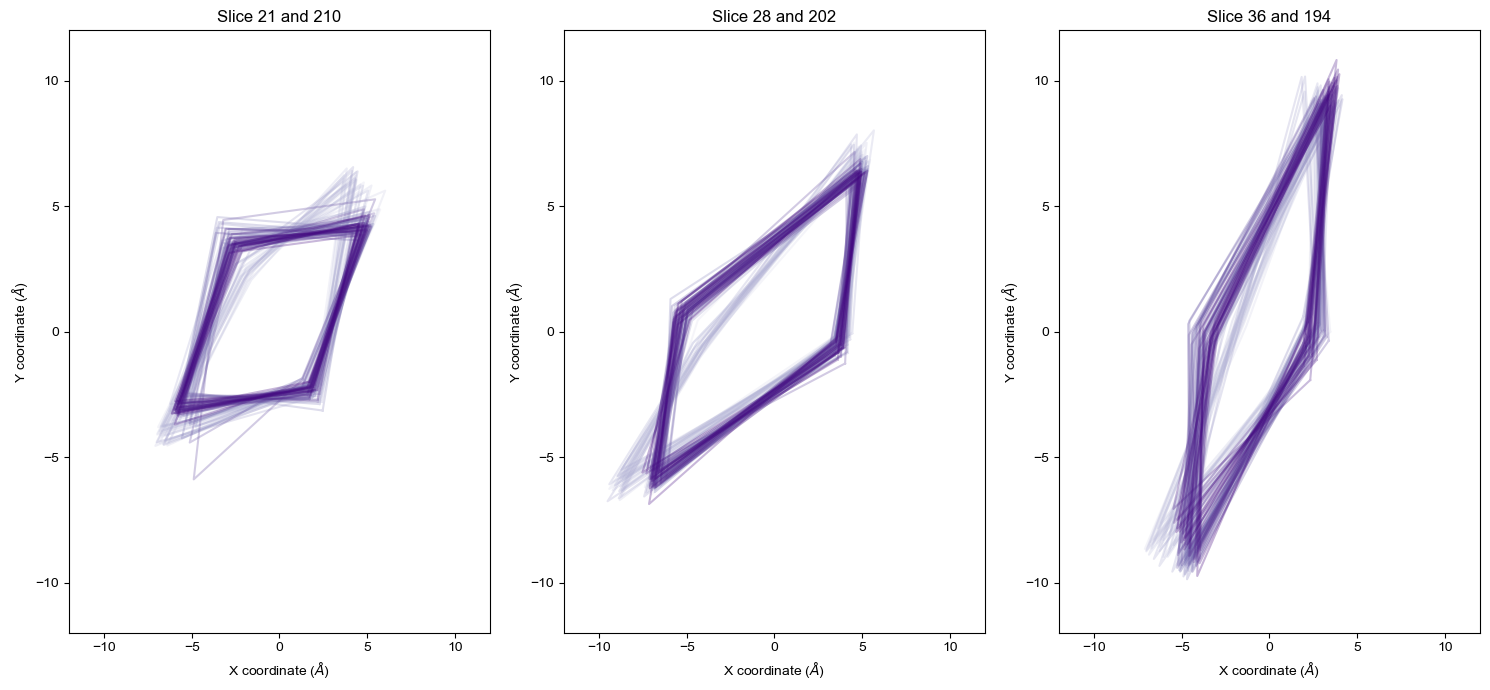

In [4]:
def plot_slices(df, n_of_last_frames):
    points = df.groupby(['PointA','PointB']).size().reset_index()
    max_ = max(df.Frame)
    step_ = 50
    colors1 = plt.cm.Purples(np.linspace(0.2, 1, max_))
    fig, axs = plt.subplots(1, len(points), figsize=(15,7))
    for ax,(_,point) in zip(axs, points.iterrows()):
        for i in range(1,max_, step_):
            tmp = df[(df.PointA==point.PointA) & (df.PointB==point.PointB)].tail(n_of_last_frames)
            x = [tmp.Ax[tmp.Frame==i], tmp.Bx[tmp.Frame==i], tmp.Cx[tmp.Frame==i], tmp.Dx[tmp.Frame==i], tmp.Ax[tmp.Frame==i]]
            y = [tmp.Ay[tmp.Frame==i], tmp.By[tmp.Frame==i], tmp.Cy[tmp.Frame==i], tmp.Dy[tmp.Frame==i], tmp.Ay[tmp.Frame==i]]
            ax.set_xlabel("X coordinate ($\AA$)")
            ax.set_ylabel("Y coordinate ($\AA$)")
            ax.plot(x - np.mean(x),y - np.mean(y), color=colors1[i-1], alpha=0.3)
            minimum = np.min([x - np.mean(x),y - np.mean(y)])
            maximum = np.max([x - np.mean(x),y - np.mean(y)])
            ax.set_title(f"Slice {point.PointA} and {point.PointB}")
            ax.set_xlim([-12, 12])
            ax.set_ylim([-12, 12])
    plt.tight_layout()
    plt.show()
    plt.close()

af_tmd = read_slices_file("Outputs/TMSlices_phoqaftmd.dat")
plot_slices(af, len(af_tmd))

##### Hybrid with TMD 

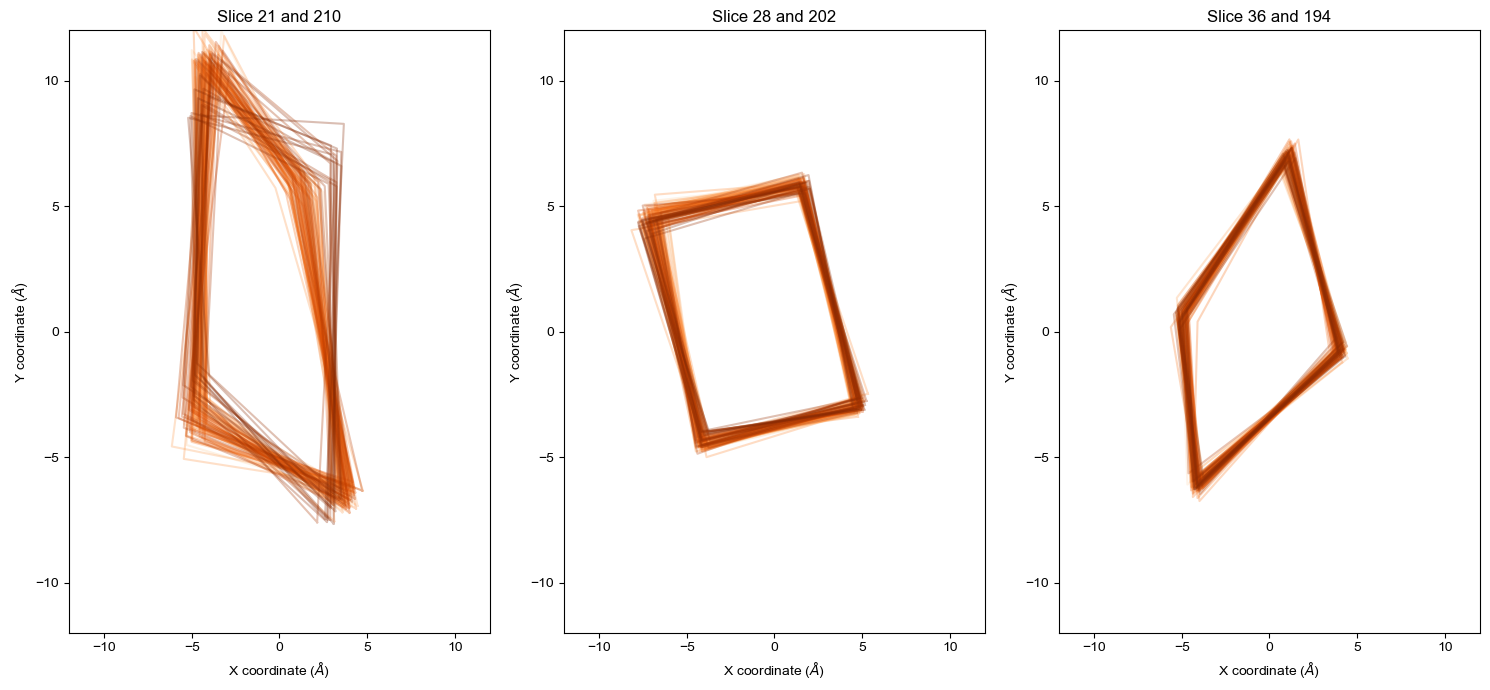

In [5]:
def plot_slices(df, n_of_last_frames):
    points = df.groupby(['PointA','PointB']).size().reset_index()
    max_ = max(df.Frame)
    step_ = 50
    colors1 = plt.cm.Oranges(np.linspace(0.2, 1, max_))
    fig, axs = plt.subplots(1, len(points), figsize=(15,7))
    for ax,(_,point) in zip(axs, points.iterrows()):
        for i in range(1,max_, step_):
            tmp = df[(df.PointA==point.PointA) & (df.PointB==point.PointB)].tail(n_of_last_frames)
            x = [tmp.Ax[tmp.Frame==i], tmp.Bx[tmp.Frame==i], tmp.Cx[tmp.Frame==i], tmp.Dx[tmp.Frame==i], tmp.Ax[tmp.Frame==i]]
            y = [tmp.Ay[tmp.Frame==i], tmp.By[tmp.Frame==i], tmp.Cy[tmp.Frame==i], tmp.Dy[tmp.Frame==i], tmp.Ay[tmp.Frame==i]]
            ax.set_xlabel("X coordinate ($\AA$)")
            ax.set_ylabel("Y coordinate ($\AA$)")
            ax.plot(x - np.mean(x),y - np.mean(y), color=colors1[i-1], alpha=0.3)
            minimum = np.min([x - np.mean(x),y - np.mean(y)])
            maximum = np.max([x - np.mean(x),y - np.mean(y)])
            ax.set_title(f"Slice {point.PointA} and {point.PointB}")
            ax.set_xlim([-12, 12])
            ax.set_ylim([-12, 12])
    plt.tight_layout()
    plt.show()
    plt.close()

hybrid = read_slices_file("Outputs/TMSlices_phoqc_replicas.dat")
plot_slices(hybrid, len(hybrid))

##### Hybrid 

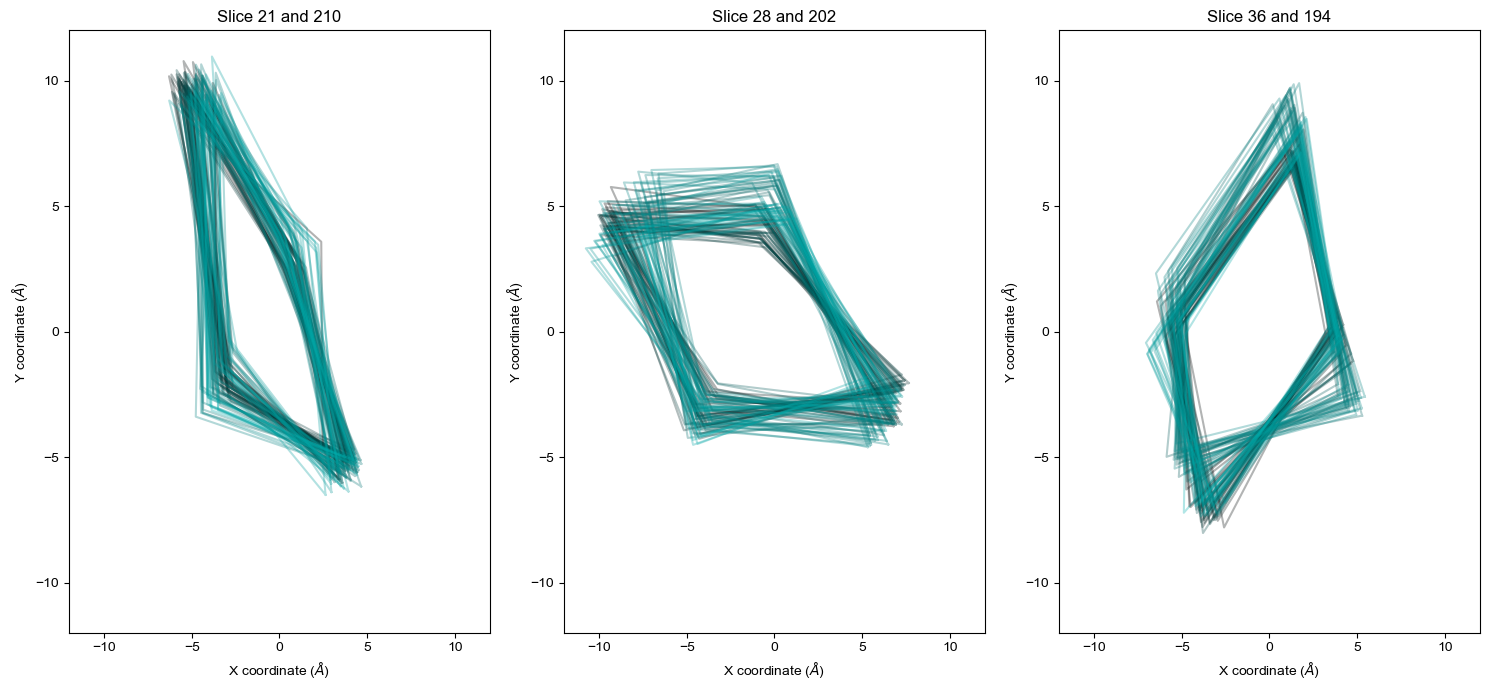

In [6]:
def plot_slices(df, n_of_last_frames):
    points = df.groupby(['PointA','PointB']).size().reset_index()
    max_ = max(df.Frame)
    step_ = 50
    
    # Define the range of teals
    teal_range = np.linspace(0, 0.8, max_)  # Adjust the range as needed
    # Create the teal colormap
    teal_colormap = plt.cm.colors.LinearSegmentedColormap.from_list('teal', [(0, 0, 0), (0, 0.5, 0.5), (0, 0.8, 0.8)])
    # Get colors from the colormap
    colors1 = teal_colormap(teal_range)

    fig, axs = plt.subplots(1, len(points), figsize=(15,7))
    for ax,(_,point) in zip(axs, points.iterrows()):
        for i in range(1,max_, step_):
            tmp = df[(df.PointA==point.PointA) & (df.PointB==point.PointB)].tail(n_of_last_frames)
            x = [tmp.Ax[tmp.Frame==i], tmp.Bx[tmp.Frame==i], tmp.Cx[tmp.Frame==i], tmp.Dx[tmp.Frame==i], tmp.Ax[tmp.Frame==i]]
            y = [tmp.Ay[tmp.Frame==i], tmp.By[tmp.Frame==i], tmp.Cy[tmp.Frame==i], tmp.Dy[tmp.Frame==i], tmp.Ay[tmp.Frame==i]]
            ax.set_xlabel("X coordinate ($\AA$)")
            ax.set_ylabel("Y coordinate ($\AA$)")
            ax.plot(x - np.mean(x),y - np.mean(y), color=colors1[i-1], alpha=0.3)
            minimum = np.min([x - np.mean(x),y - np.mean(y)])
            maximum = np.max([x - np.mean(x),y - np.mean(y)])
            ax.set_title(f"Slice {point.PointA} and {point.PointB}")
            ax.set_xlim([-12, 12])
            ax.set_ylim([-12, 12])
    plt.tight_layout()
    plt.show()
    plt.close()
    
hybrid_noTmd = read_slices_file("Outputs/TMSlices_phoqhybrid_replicas.dat")
plot_slices(hybrid_noTmd, len(hybrid_noTmd))

### Overlay slices for all simulations

#### AlphaFold Slices

Slices:  21 210


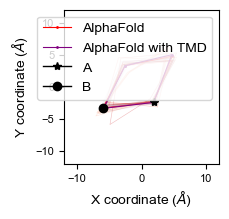

Slices:  28 202


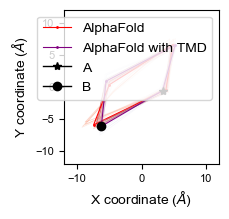

Slices:  36 194


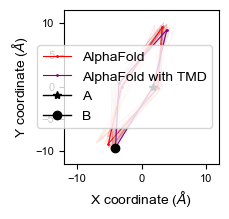

In [7]:
def joint_plot_slices(alpha, alphafold_tmd, n_of_last_frames):
    
    fontsize_label = 10
    marker_size = 1
    line_width = 0.4
    
    step_ = 200 # define the frame jumping step to plot 
    
    points = alpha.groupby(['PointA','PointB']).size().reset_index()
    max_ = max(alpha.Frame) 
    
    colors_alpha = plt.cm.Reds(np.linspace(0.2, 1, max_))
    colors_alphafold_tmd = plt.cm.Purples(np.linspace(0.2, 1, max_)) 
       
    for _,point in points.iterrows():
        print("Slices: ", point.PointA, point.PointB)
        plt.figure(figsize=(2,2))
        for i in range(1,max_, step_):
            tmp = alpha[(alpha.PointA==point.PointA) & (alpha.PointB==point.PointB)].tail(n_of_last_frames)
            x = [tmp.Ax[tmp.Frame==i], tmp.Bx[tmp.Frame==i], tmp.Cx[tmp.Frame==i], tmp.Dx[tmp.Frame==i], tmp.Ax[tmp.Frame==i]]
            y = [tmp.Ay[tmp.Frame==i], tmp.By[tmp.Frame==i], tmp.Cy[tmp.Frame==i], tmp.Dy[tmp.Frame==i], tmp.Ay[tmp.Frame==i]]
            plt.plot(x - np.mean(x),y - np.mean(y), color=colors_alpha[i-1], alpha=0.3, linewidth=line_width)
            
        tmp = alpha[(alpha.PointA==point.PointA) & (alpha.PointB==point.PointB)].tail(n_of_last_frames)
        x_avg = [np.mean(tmp.Ax), np.mean(tmp.Bx), np.mean(tmp.Cx), np.mean(tmp.Dx), np.mean(tmp.Ax)]
        y_avg = [np.mean(tmp.Ay), np.mean(tmp.By), np.mean(tmp.Cy), np.mean(tmp.Dy), np.mean(tmp.Ay)]
        plt.plot(x_avg - np.mean(x_avg),y_avg - np.mean(y_avg), color='red', marker='o', markersize=marker_size, alpha=1, linewidth=2*line_width, label="AlphaFold")
        
        for i in range(1,max_, step_):
            tmp = alphafold_tmd[(alphafold_tmd.PointA==point.PointA) & (alphafold_tmd.PointB==point.PointB)].tail(n_of_last_frames)
            x = [tmp.Ax[tmp.Frame==i], tmp.Bx[tmp.Frame==i], tmp.Cx[tmp.Frame==i], tmp.Dx[tmp.Frame==i], tmp.Ax[tmp.Frame==i]]
            y = [tmp.Ay[tmp.Frame==i], tmp.By[tmp.Frame==i], tmp.Cy[tmp.Frame==i], tmp.Dy[tmp.Frame==i], tmp.Ay[tmp.Frame==i]]
            plt.plot(x - np.mean(x),y - np.mean(y), color=colors_alphafold_tmd[i-1], alpha=0.3, linewidth=line_width)
        
        tmp = alphafold_tmd[(alphafold_tmd.PointA==point.PointA) & (alphafold_tmd.PointB==point.PointB)].tail(n_of_last_frames)
        x = [np.mean(tmp.Ax), np.mean(tmp.Bx), np.mean(tmp.Cx), np.mean(tmp.Dx), np.mean(tmp.Ax)]
        y = [np.mean(tmp.Ay), np.mean(tmp.By), np.mean(tmp.Cy), np.mean(tmp.Dy), np.mean(tmp.Ay)]          
        plt.xlabel("X coordinate ($\AA$)", fontsize=fontsize_label)
        plt.ylabel("Y coordinate ($\AA$)", fontsize=fontsize_label)
        plt.plot(x - np.mean(x),y - np.mean(y), color='purple',marker="o",markersize=marker_size, alpha=1, linewidth=2*line_width, label="AlphaFold with TMD")
        
        plt.plot(x[0] - np.mean(x),y[0] - np.mean(y), color='black', marker="*", alpha=1, linewidth=1, label="A")
        plt.plot(x[1] - np.mean(x),y[1] - np.mean(y), color='black', marker="o", alpha=1, linewidth=1, label="B")
        
        minimum = np.min([np.hstack((x - np.mean(x),x_avg - np.mean(x_avg))),np.hstack((y - np.mean(y),y_avg - np.mean(y_avg)))])
        maximum = np.max([np.hstack((x - np.mean(x),x_avg - np.mean(x_avg))),np.hstack((y - np.mean(y),y_avg - np.mean(y_avg)))])
        
        plt.legend(fontsize=fontsize_label)
        plt.xlim([-12,12])
        plt.ylim([-12,12])
        plt.yticks(fontsize=8)
        plt.xticks(fontsize=8) 
        plt.minorticks_off()
        plt.savefig(f"/home/symela/Documents/Symela/PhD/Project/PhoQ/PhoQ/Documents/Figures/Figure03_Slices/Slice {point.PointA} and {point.PointB}_AF.svg")
        plt.show()
        plt.close()

#folder = "/home/symela/Documents/Symela/PhD/Project/PhoQ/PhoQ/Processing"
#os.system(f"""vmd -dispdev text -e slices_aligned.tcl -args {folder}/phoq_af_replicas/step5_charmm2omm.psf {folder}/phoq_af_replicas/phoq_af_replicas.dcd {folder}/phoq_c_replicas/step5_charmm2omm.psf {folder}/phoq_c_replicas/phoq_c_replicas.dcd TM_slices""")

alphafold = read_slices_file("Outputs/TMSlices_phoqaf_replicas.dat")
alphafold_tmd = read_slices_file("Outputs/TMSlices_phoqaftmd.dat")
joint_plot_slices(alphafold, alphafold_tmd, 5000)

#### Hybrid Slices

Slices:  21 210


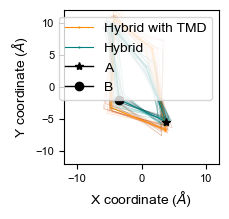

Slices:  28 202


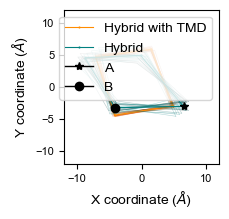

Slices:  36 194


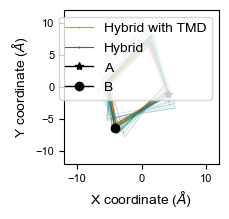

In [8]:
def joint_plot_slices(hybrid, hybrid_notmd, n_of_last_frames):
    
    fontsize_label = 10
    marker_size = 1
    line_width = 0.4
    
    step_ = 200 # define the frame jumping step to plot 
    
    points = hybrid.groupby(['PointA','PointB']).size().reset_index()
    max_ = max(hybrid.Frame) 
    
    colors_hybrid = plt.cm.Oranges(np.linspace(0.2, 1, max_))
    
    # Define the range of teals
    teal_range = np.linspace(0, 0.8, max_)  # Adjust the range as needed
    # Create the teal colormap
    teal_colormap = plt.cm.colors.LinearSegmentedColormap.from_list('teal', [(0, 0, 0), (0, 0.5, 0.5), (0, 0.8, 0.8)])
    # Get colors from the colormap
    colors_hybrid_notmd = teal_colormap(teal_range)
       
    for _,point in points.iterrows():
        print("Slices: ", point.PointA, point.PointB)
        plt.figure(figsize=(2,2))
        for i in range(1,max_, step_):
            tmp = hybrid[(hybrid.PointA==point.PointA) & (hybrid.PointB==point.PointB)].tail(n_of_last_frames)
            x = [tmp.Ax[tmp.Frame==i], tmp.Bx[tmp.Frame==i], tmp.Cx[tmp.Frame==i], tmp.Dx[tmp.Frame==i], tmp.Ax[tmp.Frame==i]]
            y = [tmp.Ay[tmp.Frame==i], tmp.By[tmp.Frame==i], tmp.Cy[tmp.Frame==i], tmp.Dy[tmp.Frame==i], tmp.Ay[tmp.Frame==i]]
            plt.plot(x - np.mean(x),y - np.mean(y), color=colors_hybrid[i-1], alpha=0.3, linewidth=line_width)
            
        tmp = hybrid[(hybrid.PointA==point.PointA) & (hybrid.PointB==point.PointB)].tail(n_of_last_frames)
        x_avg = [np.mean(tmp.Ax), np.mean(tmp.Bx), np.mean(tmp.Cx), np.mean(tmp.Dx), np.mean(tmp.Ax)]
        y_avg = [np.mean(tmp.Ay), np.mean(tmp.By), np.mean(tmp.Cy), np.mean(tmp.Dy), np.mean(tmp.Ay)]
        plt.plot(x_avg - np.mean(x_avg),y_avg - np.mean(y_avg), color='darkorange', marker='.', markersize=marker_size, alpha=1, linewidth=2*line_width, label="Hybrid with TMD")
        
        for i in range(1,max_, step_):
            tmp = hybrid_notmd[(hybrid_notmd.PointA==point.PointA) & (hybrid_notmd.PointB==point.PointB)].tail(n_of_last_frames)
            x = [tmp.Ax[tmp.Frame==i], tmp.Bx[tmp.Frame==i], tmp.Cx[tmp.Frame==i], tmp.Dx[tmp.Frame==i], tmp.Ax[tmp.Frame==i]]
            y = [tmp.Ay[tmp.Frame==i], tmp.By[tmp.Frame==i], tmp.Cy[tmp.Frame==i], tmp.Dy[tmp.Frame==i], tmp.Ay[tmp.Frame==i]]
            plt.plot(x - np.mean(x),y - np.mean(y), color=colors_hybrid_notmd[i-1], alpha=0.3, linewidth=line_width)
        
        tmp = hybrid_notmd[(hybrid_notmd.PointA==point.PointA) & (hybrid_notmd.PointB==point.PointB)].tail(n_of_last_frames)
        x = [np.mean(tmp.Ax), np.mean(tmp.Bx), np.mean(tmp.Cx), np.mean(tmp.Dx), np.mean(tmp.Ax)]
        y = [np.mean(tmp.Ay), np.mean(tmp.By), np.mean(tmp.Cy), np.mean(tmp.Dy), np.mean(tmp.Ay)]          
        plt.xlabel("X coordinate ($\AA$)", fontsize=fontsize_label)
        plt.ylabel("Y coordinate ($\AA$)", fontsize=fontsize_label)
        plt.plot(x - np.mean(x),y - np.mean(y), color='teal',marker=".",markersize=marker_size, alpha=1, linewidth=2*line_width, label="Hybrid")
        
        plt.plot(x[0] - np.mean(x),y[0] - np.mean(y), color='black', marker="*", alpha=1, linewidth=1, label="A")
        plt.plot(x[1] - np.mean(x),y[1] - np.mean(y), color='black', marker="o", alpha=1, linewidth=1, label="B")
        
        minimum = np.min([np.hstack((x - np.mean(x),x_avg - np.mean(x_avg))),np.hstack((y - np.mean(y),y_avg - np.mean(y_avg)))])
        maximum = np.max([np.hstack((x - np.mean(x),x_avg - np.mean(x_avg))),np.hstack((y - np.mean(y),y_avg - np.mean(y_avg)))])
        
        plt.legend(fontsize=fontsize_label)
        plt.xlim([-12,12])
        plt.ylim([-12,12])
        plt.yticks(fontsize=8)
        plt.xticks(fontsize=8) 
        plt.minorticks_off()
        plt.savefig(f"/home/symela/Documents/Symela/PhD/Project/PhoQ/PhoQ/Documents/Figures/Figure03_Slices/Slice {point.PointA} and {point.PointB}_H.svg")
        plt.show()
        plt.close()

#folder = "/home/symela/Documents/Symela/PhD/Project/PhoQ/PhoQ/Processing"
#os.system(f"""vmd -dispdev text -e slices_aligned.tcl -args {folder}/phoq_af_replicas/step5_charmm2omm.psf {folder}/phoq_af_replicas/phoq_af_replicas.dcd {folder}/phoq_c_replicas/step5_charmm2omm.psf {folder}/phoq_c_replicas/phoq_c_replicas.dcd TM_slices""")

hybrid = read_slices_file("Outputs/TMSlices_phoqc_replicas.dat")
hybrid_notmd = read_slices_file("Outputs/TMSlices_phoqhybrid_replicas.dat")

joint_plot_slices(hybrid, hybrid_notmd, 5000)

#### AlphaFold vs Hybrid with TMD vs Hybrid without TMD

Slices:  21 210


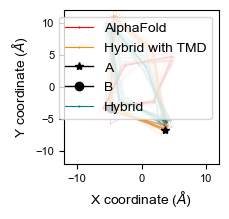

Slices:  28 202


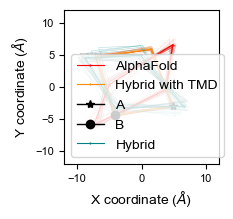

Slices:  36 194


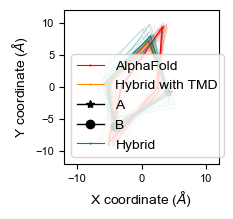

In [9]:
def joint_plot_slices(alpha,hybrid, hybrid_notmd, n_of_last_frames):
    fontsize_label = 10
    marker_size = 1
    line_width = 0.4
    step_ = 200 # define the frame jumping step to plot 
    
    points = alpha.groupby(['PointA','PointB']).size().reset_index()
    max_ = max(alpha.Frame) 
    
    colors_alpha = plt.cm.Reds(np.linspace(0.2, 1, max_))
    colors_hybrid = plt.cm.Oranges(np.linspace(0.2, 1, max_))
    
    # Define the range of teals
    teal_range = np.linspace(0, 0.8, max_)  # Adjust the range as needed
    # Create the teal colormap
    teal_colormap = plt.cm.colors.LinearSegmentedColormap.from_list('teal', [(0, 0, 0), (0, 0.5, 0.5), (0, 0.8, 0.8)])
    # Get colors from the colormap
    colors_hybrid_notmd = teal_colormap(teal_range)

    
    for _,point in points.iterrows():
        print("Slices: ", point.PointA, point.PointB)
        plt.figure(figsize=(2,2))
        for i in range(1,max_, step_):
            tmp = alpha[(alpha.PointA==point.PointA) & (alpha.PointB==point.PointB)].tail(n_of_last_frames)
            x = [tmp.Ax[tmp.Frame==i], tmp.Bx[tmp.Frame==i], tmp.Cx[tmp.Frame==i], tmp.Dx[tmp.Frame==i], tmp.Ax[tmp.Frame==i]]
            y = [tmp.Ay[tmp.Frame==i], tmp.By[tmp.Frame==i], tmp.Cy[tmp.Frame==i], tmp.Dy[tmp.Frame==i], tmp.Ay[tmp.Frame==i]]
            plt.plot(x - np.mean(x),y - np.mean(y), color=colors_alpha[i-1], alpha=0.3, linewidth=line_width)
            
        tmp = alpha[(alpha.PointA==point.PointA) & (alpha.PointB==point.PointB)].tail(n_of_last_frames)
        x_avg = [np.mean(tmp.Ax), np.mean(tmp.Bx), np.mean(tmp.Cx), np.mean(tmp.Dx), np.mean(tmp.Ax)]
        y_avg = [np.mean(tmp.Ay), np.mean(tmp.By), np.mean(tmp.Cy), np.mean(tmp.Dy), np.mean(tmp.Ay)]
        plt.plot(x_avg - np.mean(x_avg),y_avg - np.mean(y_avg), color='red', marker='.', markersize=marker_size, alpha=1, linewidth=2*line_width, label="AlphaFold")
                
        
        for i in range(1,max_, step_):
            tmp = hybrid[(hybrid.PointA==point.PointA) & (hybrid.PointB==point.PointB)].tail(n_of_last_frames)
            x = [tmp.Ax[tmp.Frame==i], tmp.Bx[tmp.Frame==i], tmp.Cx[tmp.Frame==i], tmp.Dx[tmp.Frame==i], tmp.Ax[tmp.Frame==i]]
            y = [tmp.Ay[tmp.Frame==i], tmp.By[tmp.Frame==i], tmp.Cy[tmp.Frame==i], tmp.Dy[tmp.Frame==i], tmp.Ay[tmp.Frame==i]]
            plt.plot(x - np.mean(x),y - np.mean(y), color=colors_hybrid[i-1], alpha=0.3, linewidth=line_width)
        
        tmp = hybrid[(hybrid.PointA==point.PointA) & (hybrid.PointB==point.PointB)].tail(n_of_last_frames)
        x = [np.mean(tmp.Ax), np.mean(tmp.Bx), np.mean(tmp.Cx), np.mean(tmp.Dx), np.mean(tmp.Ax)]
        y = [np.mean(tmp.Ay), np.mean(tmp.By), np.mean(tmp.Cy), np.mean(tmp.Dy), np.mean(tmp.Ay)]          
        plt.xlabel("X coordinate ($\AA$)", fontsize=fontsize_label)
        plt.ylabel("Y coordinate ($\AA$)", fontsize=fontsize_label)
        plt.plot(x - np.mean(x),y - np.mean(y), color='darkorange',marker=".",markersize=marker_size, alpha=1, linewidth=2*line_width, label="Hybrid with TMD")
        
        plt.plot(x[0] - np.mean(x),y[0] - np.mean(y), color='black', marker="*", alpha=1, linewidth=1, label="A")
        plt.plot(x[1] - np.mean(x),y[1] - np.mean(y), color='black', marker="o", alpha=1, linewidth=1, label="B")
        
        
        for i in range(1,max_, step_):
            tmp = hybrid_notmd[(hybrid_notmd.PointA==point.PointA) & (hybrid_notmd.PointB==point.PointB)].tail(n_of_last_frames)
            x = [tmp.Ax[tmp.Frame==i], tmp.Bx[tmp.Frame==i], tmp.Cx[tmp.Frame==i], tmp.Dx[tmp.Frame==i], tmp.Ax[tmp.Frame==i]]
            y = [tmp.Ay[tmp.Frame==i], tmp.By[tmp.Frame==i], tmp.Cy[tmp.Frame==i], tmp.Dy[tmp.Frame==i], tmp.Ay[tmp.Frame==i]]
            plt.plot(x - np.mean(x),y - np.mean(y), color=colors_hybrid_notmd[i-1], alpha=0.3, linewidth=line_width)
        
        tmp = hybrid_notmd[(hybrid_notmd.PointA==point.PointA) & (hybrid_notmd.PointB==point.PointB)].tail(n_of_last_frames)
        x = [np.mean(tmp.Ax), np.mean(tmp.Bx), np.mean(tmp.Cx), np.mean(tmp.Dx), np.mean(tmp.Ax)]
        y = [np.mean(tmp.Ay), np.mean(tmp.By), np.mean(tmp.Cy), np.mean(tmp.Dy), np.mean(tmp.Ay)]          
        plt.xlabel("X coordinate ($\AA$)", fontsize=fontsize_label)
        plt.ylabel("Y coordinate ($\AA$)", fontsize=fontsize_label)
        plt.plot(x - np.mean(x),y - np.mean(y), color='teal',marker=".", markersize=marker_size, alpha=1, linewidth=2*line_width, label="Hybrid")
        
        minimum = np.min([np.hstack((x - np.mean(x),x_avg - np.mean(x_avg))),np.hstack((y - np.mean(y),y_avg - np.mean(y_avg)))])
        maximum = np.max([np.hstack((x - np.mean(x),x_avg - np.mean(x_avg))),np.hstack((y - np.mean(y),y_avg - np.mean(y_avg)))])
        
        plt.legend(fontsize=fontsize_label)
        plt.xlim([-12,12])
        plt.ylim([-12,12])
        plt.yticks(fontsize=8)
        plt.xticks(fontsize=8) 
        plt.minorticks_off()
        plt.savefig(f"/home/symela/Documents/Symela/PhD/Project/PhoQ/PhoQ/Documents/Figures/Figure03_Slices/Slice {point.PointA} and {point.PointB}.svg", transparent=True)
        plt.show()
        plt.close()

#folder = "/home/symela/Documents/Symela/PhD/Project/PhoQ/PhoQ/Processing"
#os.system(f"""vmd -dispdev text -e slices_aligned.tcl -args {folder}/phoq_af_replicas/step5_charmm2omm.psf {folder}/phoq_af_replicas/phoq_af_replicas.dcd {folder}/phoq_c_replicas/step5_charmm2omm.psf {folder}/phoq_c_replicas/phoq_c_replicas.dcd TM_slices""")

alphafold = read_slices_file("Outputs/TMSlices_phoqaf_replicas.dat")
hybrid = read_slices_file("Outputs/TMSlices_phoqc_replicas.dat")
hybrid_notmd = read_slices_file("Outputs/TMSlices_phoqhybrid_replicas.dat")
joint_plot_slices(alphafold, hybrid, hybrid_notmd, 5000)

# Angles

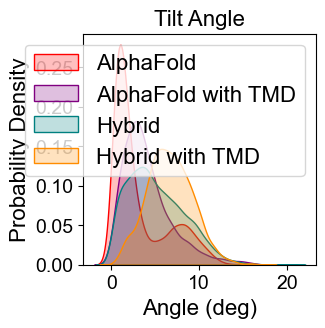

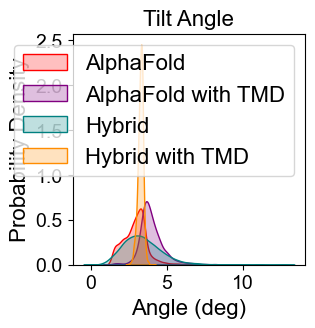

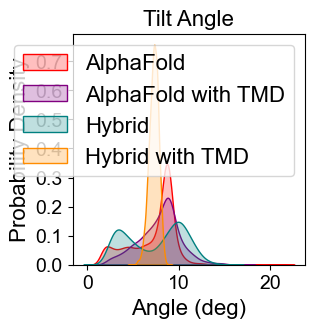

In [10]:
import seaborn as sns

# Read simulations
af = read_slices_file("Outputs/TMSlices_phoqaf_replicas.dat")
af_tmd = read_slices_file("Outputs/TMSlices_phoqaftmd.dat")
hybrid = read_slices_file("Outputs/TMSlices_phoqhybrid_replicas.dat")
hybrid_tmd = read_slices_file("Outputs/TMSlices_phoqc_replicas.dat")

# Define color for each simulation
sims = [af, af_tmd, hybrid, hybrid_tmd]
colors = ["red", "purple", "teal", "darkorange"]
labels = ["AlphaFold", "AlphaFold with TMD", "Hybrid", "Hybrid with TMD"]
# Get unique points for all the simulation
points = af.groupby(['PointA','PointB']).size().reset_index()

for _,point in points.iterrows():
    plt.figure(figsize=(3,3))
    for label,(sim,c) in zip(labels,zip(sims, colors)):
        data = sim[(sim.PointA==point.PointA) & (sim.PointB==point.PointB)]
        sns.distplot(data.AngleTilt, hist=False, kde=True, kde_kws={'shade': True, 'linewidth':1}, label=label, color = c)
    plt.legend(fontsize=16)
    plt.title("Tilt Angle", fontsize=16)
    plt.xlabel("Angle (deg)", fontsize=16)
    plt.ylabel("Probability Density", fontsize=16)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.savefig(f"/home/symela/Documents/Symela/PhD/Project/PhoQ/PhoQ/Documents/Figures/Figure03_Slices/TiltAngle Slice {point.PointA} and {point.PointB}.svg", transparent=True)
    plt.show()


# Z displacement

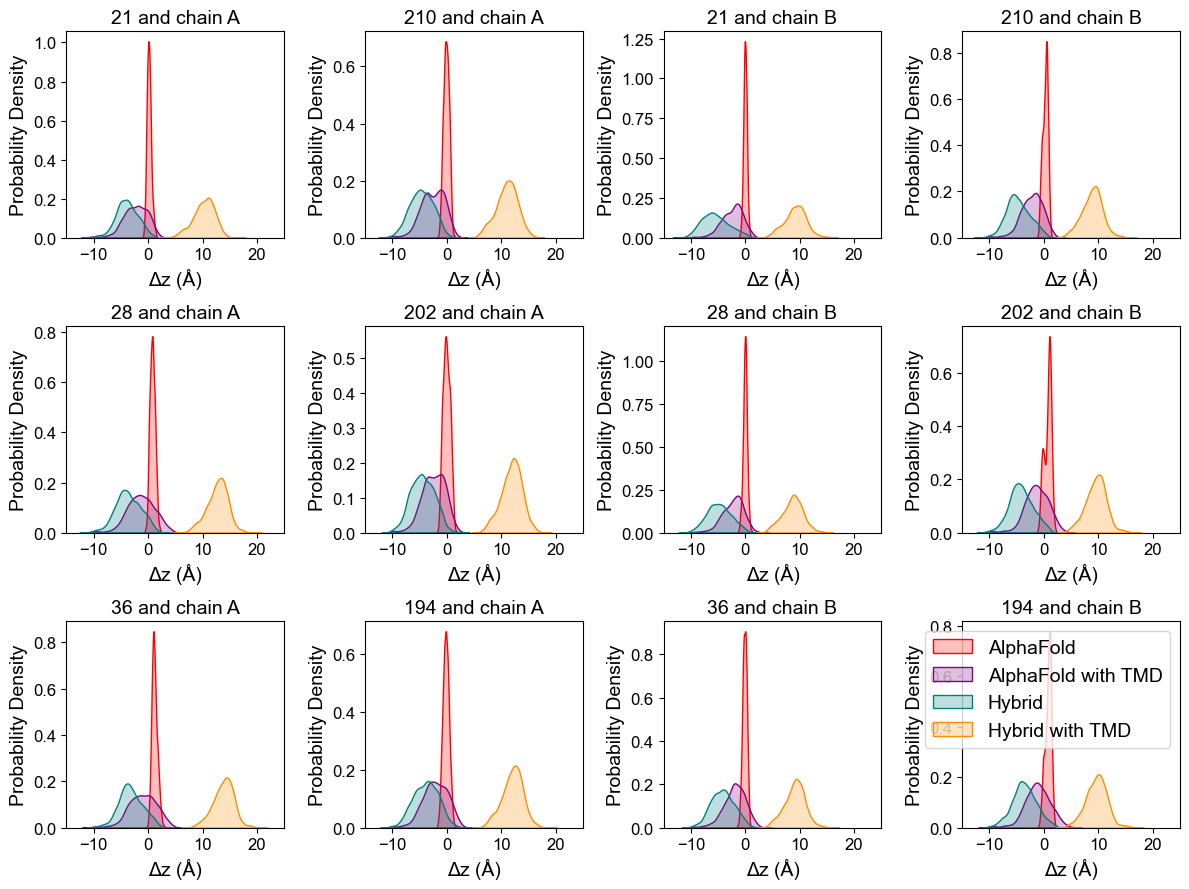

In [11]:
import seaborn as sns

# Read simulations
af = read_slices_file("Outputs/TMSlices_phoqaf_replicas.dat")
af_tmd = read_slices_file("Outputs/TMSlices_phoqaftmd.dat")
hybrid = read_slices_file("Outputs/TMSlices_phoqhybrid_replicas.dat")
hybrid_tmd = read_slices_file("Outputs/TMSlices_phoqc_replicas.dat")

# Define color for each simulation
sims = [af, af_tmd, hybrid, hybrid_tmd]
colors = ["red", "purple", "teal", "darkorange"]
labels = ["AlphaFold", "AlphaFold with TMD", "Hybrid", "Hybrid with TMD"]

# Get unique points for all the simulation
points = af.groupby(['PointA','PointB']).size().reset_index()
displacements = af.columns[-4:]

fig, axs = plt.subplots(3, 4, figsize=(12, 9))  # 4 columns, 1 row, each subplot size is 3x3

for j,point in points.iterrows():
    # Create a figure and subplots with a size of 3x3 each  
    titles = [f"{point.PointA} and chain A",
              f"{point.PointB} and chain A",
              f"{point.PointA} and chain B",
              f"{point.PointB} and chain B"]
    # Plot on the subplots
    for i in range(len(displacements)):
        ax=axs[j,i]
        for label,(sim,c) in zip(labels,zip(sims, colors)):
            data = sim[(sim.PointA==point.PointA) & (sim.PointB==point.PointB)]
            sns.distplot(data[displacements[i]], hist=False, kde=True, kde_kws={'shade': True, 'linewidth':1}, label=label, color = c, ax=ax)  
        ax.set_title(titles[i], fontsize=14)
        ax.set_xlabel("Δz (Å)", fontsize=14)
        ax.set_ylabel("Probability Density", fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.set_xlim(-15,25)
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.legend(fontsize=14)
plt.savefig(f"/home/symela/Documents/Symela/PhD/Project/PhoQ/PhoQ/Documents/Figures/Figure03_Slices/Δz Slice.svg", transparent=True)    
plt.show()


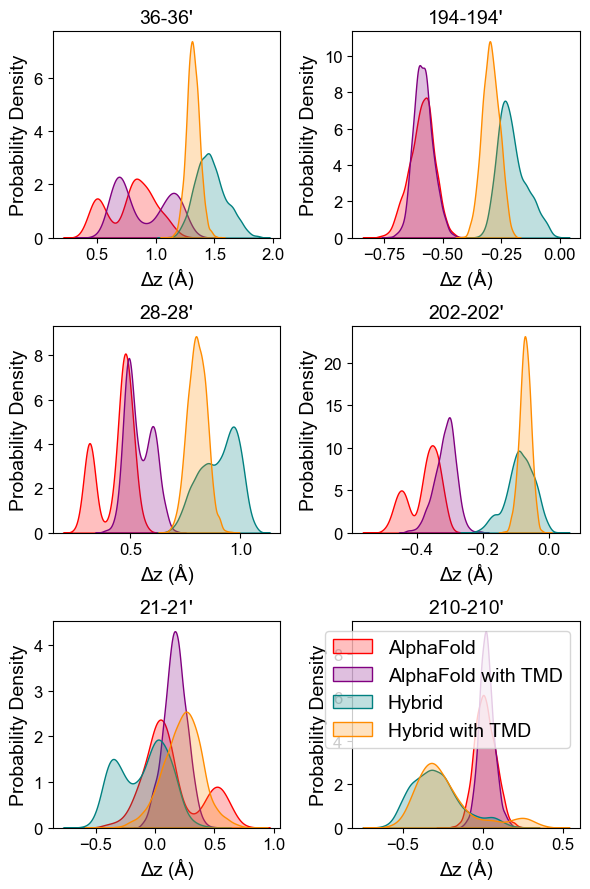

In [28]:
import seaborn as sns

# Read simulations
af = read_slices_file("Outputs/TMSlices_phoqaf_replicas.dat")
af_tmd = read_slices_file("Outputs/TMSlices_phoqaftmd.dat")
hybrid = read_slices_file("Outputs/TMSlices_phoqhybrid_replicas.dat")
hybrid_tmd = read_slices_file("Outputs/TMSlices_phoqc_replicas.dat")

# Simulations list
sims = [af, af_tmd, hybrid, hybrid_tmd]

for sim in sims:
    sim["DzAC"] = sim["Az"] - sim["Cz"]
    sim["DzBD"] = sim["Bz"] - sim["Dz"]
    #sim["DzAB"] = sim["Az"] - sim["Bz"]
    #sim["DzCD"] = sim["Cz"] - sim["Dz"]
    

# Define color for each simulation
colors = ["red", "purple", "teal", "darkorange"]
labels = ["AlphaFold", "AlphaFold with TMD", "Hybrid", "Hybrid with TMD"]

# Get unique points for all the simulation
points = af.groupby(['PointA','PointB']).size().reset_index()
points.sort_values(by=["PointB"], inplace=True)
points.reset_index(inplace=True)

displacements = af.columns[-2:]

fig, axs = plt.subplots(3, len(displacements), figsize=(6, 9)) # 3x3 subfigure

for j,point in points.iterrows():
    # Create a figure and subplots with a size of 3x3 each  
    titles = [f"{point.PointA}-{point.PointA}'",
             f"{point.PointB}-{point.PointB}'"]
             #f"{point.PointA}-{point.PointB}",
             #f"{point.PointA}'-{point.PointB}'"]
    # Plot on the subplots
    for i in range(len(displacements)):
        ax=axs[j,i]
        for label,(sim,c) in zip(labels,zip(sims, colors)):
            data = sim[(sim.PointA==point.PointA) & (sim.PointB==point.PointB)]
            sns.distplot(data[displacements[i]], hist=False, kde=True, kde_kws={'shade': True, 'linewidth':1}, label=label, color = c, ax=ax)  
        ax.set_title(titles[i], fontsize=14)
        ax.set_xlabel("Δz (Å)", fontsize=14)
        ax.set_ylabel("Probability Density", fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        #ax.set_xlim(-15,25)
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.legend(fontsize=14)
plt.savefig(f"/home/symela/Documents/Symela/PhD/Project/PhoQ/PhoQ/Documents/Figures/Figure03_Slices/FigureS9.svg", transparent=True)    
plt.show()
